<h1 style="text-align:center;">
    Practica 4 
</h1>
<h2 style="text-align:center;">
    Ejericio 1
</h2>
<h3 style="text-align:center;">
   Alumno: Victor Islachin
</h3>

In [1]:
#importamos pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#cargamos en una variable el csv con la informacion
datosasketball = pd.read_csv("basketball.csv")

In [2]:
#Muestra información del contenido
datosasketball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
height                 54 non-null float64
weight                 54 non-null int64
success_field_goals    54 non-null float64
success_free_throws    54 non-null float64
avg_points_scored      54 non-null float64
dtypes: float64(4), int64(1)
memory usage: 2.2 KB


In [3]:
#Mostrar las primeras 5 líneas de la data
datosasketball.head()

,height,weight,success_field_goals,success_free_throws,avg_points_scored
0,6.8,225,0.442,0.672,9.2
1,6.3,180,0.435,0.797,11.7
2,6.4,190,0.456,0.761,15.8
3,6.2,180,0.416,0.651,8.6
4,6.9,205,0.449,0.900,23.2


In [4]:
#cambiamos los nombres de las columnas
datosasketball = datosasketball.rename(columns={'height':'altura','weight':'peso','success_field_goals':'tirosCampoExito','success_free_throws':'tirosLibreExito','avg_points_scored':'promPuntosJuego'})

In [5]:
#mostramos el cambio
datosasketball.head()

,altura,peso,tirosCampoExito,tirosLibreExito,promPuntosJuego
0,6.8,225,0.442,0.672,9.2
1,6.3,180,0.435,0.797,11.7
2,6.4,190,0.456,0.761,15.8
3,6.2,180,0.416,0.651,8.6
4,6.9,205,0.449,0.900,23.2


In [6]:
#verificamos si hay nulls
nulos = datosasketball.isnull().sum()
nulos

altura             0
peso               0
tirosCampoExito    0
tirosLibreExito    0
promPuntosJuego    0
dtype: int64

<h1> Probando las variables que tienen mas relacion </h1>

In [7]:
%matplotlib inline

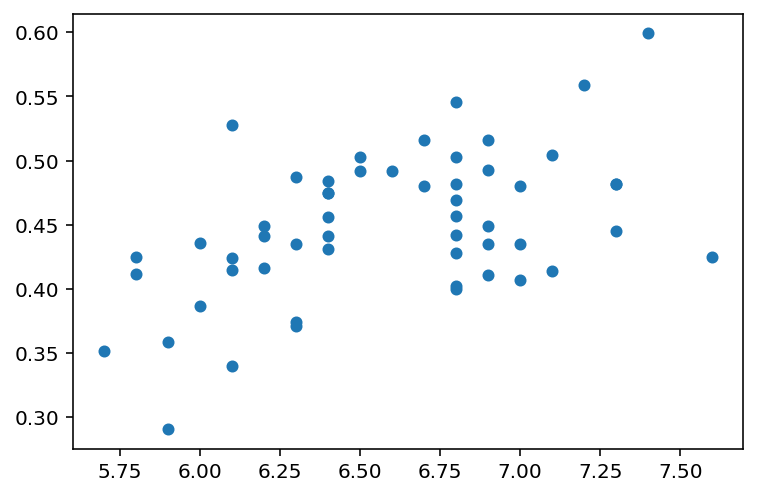

In [8]:
#relacionamos altura con tiros de campo exitosos 
plt.plot(datosasketball.altura,datosasketball.tirosCampoExito,'o',markersize = 5)

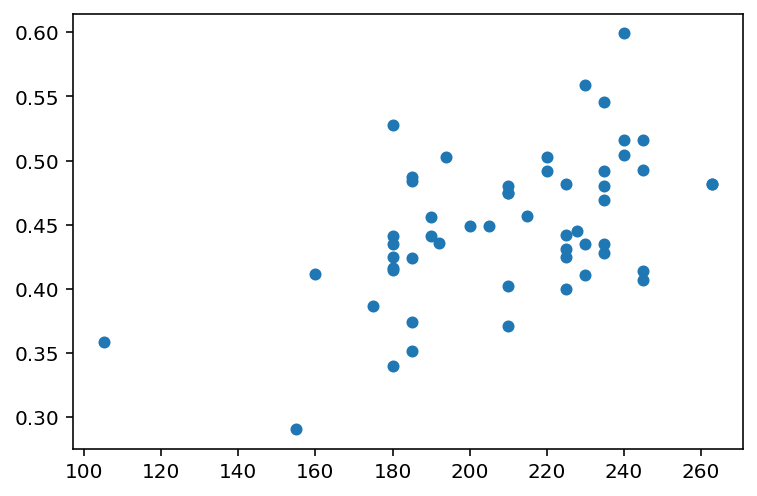

In [9]:
#relacionamos peso con tiros de campo exitosos 
plt.plot(datosasketball.peso,datosasketball.tirosCampoExito,'o',markersize = 5)

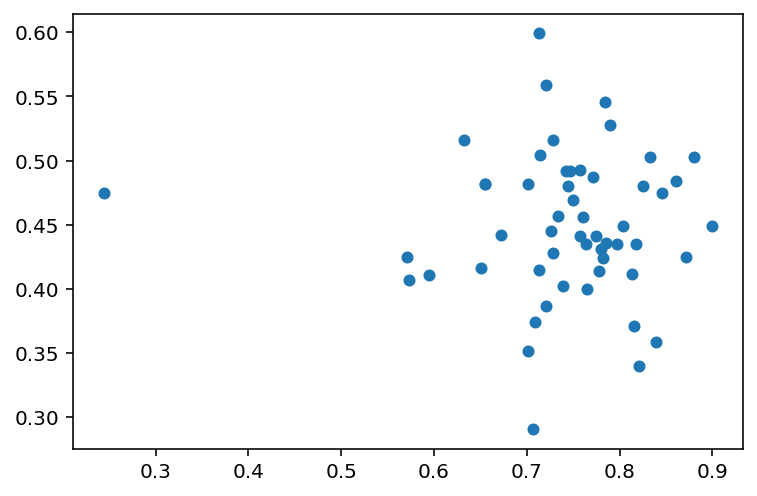

In [10]:
#relacionamos tiros libres exitosos  con tiros de campo exitosos 
plt.plot(datosasketball.tirosLibreExito,datosasketball.tirosCampoExito,'o',markersize = 5)

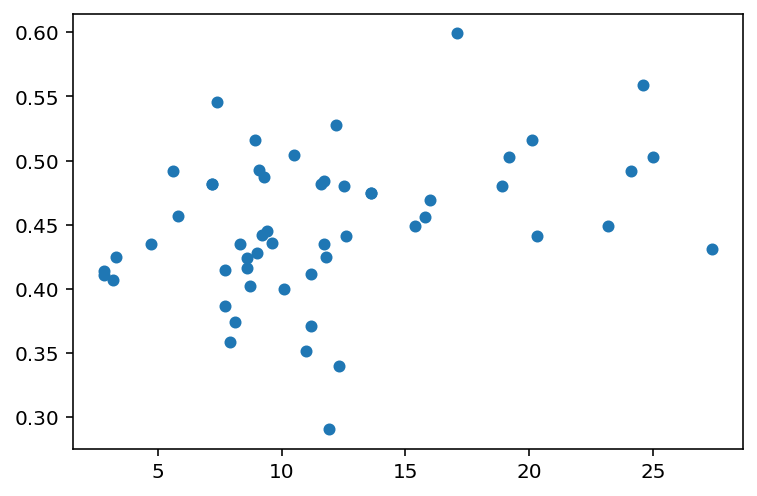

In [11]:
#relacionamos promedio de Puntos por Juego  con tiros de campo exitosos 
plt.plot(datosasketball.promPuntosJuego,datosasketball.tirosCampoExito,'o',markersize = 5)

<h1> Empezamos la Regresion: </h1>

In [12]:
# variable objetivo
y = datosasketball.tirosCampoExito
y.head()

0    0.442
1    0.435
2    0.456
3    0.416
4    0.449
Name: tirosCampoExito, dtype: float64

In [13]:
# retiramos la variable objetivo (dependiente) para quedarnos con las variables independientes
x = datosasketball.drop(['tirosCampoExito'], axis=1)
x.head()

,altura,peso,tirosLibreExito,promPuntosJuego
0,6.8,225,0.672,9.2
1,6.3,180,0.797,11.7
2,6.4,190,0.761,15.8
3,6.2,180,0.651,8.6
4,6.9,205,0.900,23.2


In [14]:
#mostramos las variables dependientes
del x['tirosLibreExito']
x.head()

,altura,peso,promPuntosJuego
0,6.8,225,9.2
1,6.3,180,11.7
2,6.4,190,15.8
3,6.2,180,8.6
4,6.9,205,23.2


<h1> Realizamos el modelo: </h1>

In [44]:
# Separando el conjunto de datos en 2 grupos: entrenamiento (train) y prueba (test) con porcentajes de train = 80% y test = 20%
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.20)

In [45]:
# Definimos Modelo
from sklearn.linear_model import LinearRegression
model= LinearRegression(n_jobs=2)
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=2, normalize=False)

In [46]:
# Realizar la predicciòn sobre el conjunto de entrenamiento
predictions1 = model.predict(x_train)
#predictions sobre el train
predictions1

array([0.50306567, 0.46701115, 0.50075122, 0.44095998, 0.45087541,
       0.44924862, 0.40834528, 0.4576802 , 0.41963767, 0.45281623,
       0.40237849, 0.43993834, 0.49511293, 0.40391124, 0.4545242 ,
       0.45648607, 0.39648084, 0.39775149, 0.47203158, 0.43101943,
       0.50859789, 0.47740143, 0.44835979, 0.4573268 , 0.44877606,
       0.43366979, 0.4335397 , 0.45173172, 0.39766292, 0.41178826,
       0.42034912, 0.48150398, 0.48103272, 0.51486917, 0.44686037,
       0.46224898, 0.44686037, 0.52895677, 0.49924713, 0.43818774,
       0.4380273 , 0.37503582, 0.46294019])

In [47]:
#Returna el coeficiente de determinación R^2 de  la predicción. Se define como la proporción de la varianza total de la variable explicada por la regresión.
model.score(x_train,y_train)

0.37949493130029

<h2>
    Valor Del R^2
</h2>

In [48]:
model.score(x_test,y_test)

0.50198175369485